# Προηγμένα Θέματα Αλγορίθμων

## 2η Εργαστηριακή Άσκηση



Όνομα: Ιωάννης

Επώνυμο: Δορκοφίκης

Αριθμός Μητρώου: 03119079

*Οδηγίες εκτέλεσης* 

Θα πρέπει να τρέξετε το παρόν Jupyter Notebook στον ίδιο φάκελο με τα public testcases (δηλαδή τα αρχεία
ex1_public.pickle και ex2_public.pickle) και με το script evaluate.py ώστε να μπορείτε να ελέγξετε τοπικά τις λύσεις σας.


### Άσκηση (Μεταφορές καυσίμου)

Οι τιμές των καυσίμων έχουν εκτιναχθεί κυρίως επειδή η διανομή τους στα πρατήρια καυσίμων είναι
ένα περίπλοκο πρόβλημα. Θα προσπαθήσουμε να βελτιστοποιήσουμε τις μεταφορές καυσίμου ώστε να μειώσουμε
τα έξοδα μεταφοράς. Μας δίνονται $n$ παραγγελίες καυσίμων και $m$ φορτηγά. Κάθε παραγγελία καυσίμου είναι
ένας πίνακας από ποσότητες διαφορετικών καυσίμων. Για παράδειγμα, η παραγγελία $[100,200,250,40]$ είναι μια παραγγελία 100 μονάδων από το καύσιμο $1$, 200 μονάδων από το καύσιμο $2$ κ.ο.κ. Παράλληλα, τα φορτηγά μεταφοράς
έχουν διαμερίσματα συγκεκριμένης χωρητικότητας. Για παράδειγμα ένα φορτηγό μπορεί να έχει 4 ανεξάρτητα διαμερίσματα με χωρητικότητες $[1000,500,4000,800]$


Η φόρτωση μιας παραγγελίας σε ένα φορτηγό πρέπει να υπακούει σε διάφορους περιορισμούς. Αρχικά, τα καύσιμα μιας παραγγελίας είναι διαφορετικά και δεν μπορούν να αναμειχθούν στο ίδιο διαμέρισμα ενός φορτηγού. Επομένως, ένα διαμέρισμα μπορεί να πάρει καύσιμο μόνο από ένα order item. Βέβαια, αν κρίνεται απαραίτητο, μπορούμε να ''σπάσουμε'' την ποσότητα ενός συγκεκριμένου καυσίμου σε πολλά διαμερίσματα ενός φορτηγού (αν για παράδειγμα δεν χωράει σε ένα).

Ακόμα, υπάρχουν διάφοροι κανόνες ασφαλείας σχετικά με το πόσο καύσιμο μπορεί να φέρει το μεγαλύτερο διαμέρισμα
του φορτηγού. Το διαμέρισμα αυτό πρέπει να είναι είτε σχετικά γεμάτο, είτε σχεδόν άδειο γιατί αλλιώς κατά τις στροφές το καύσιμο θα ταλαντώνεται μέσα στο διαμέρισμα κάνοντας το φορτηγό ασταθές όπως φαίνεται παρακάτω. Για να μην συμβαίνει αυτό, θα πρέπει να γεμίζουμε το μεγαλύτερο διαμέρισμα είτε πάνω από $80\%$ είτε λιγότερο από $20\%$.


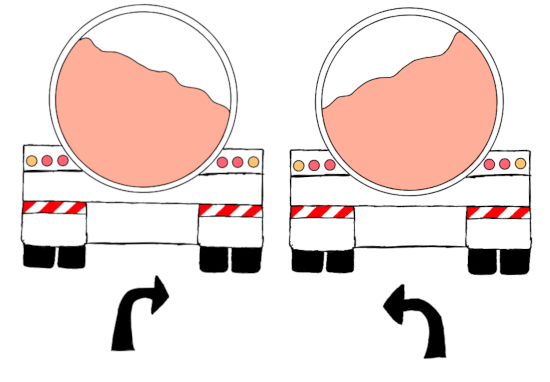

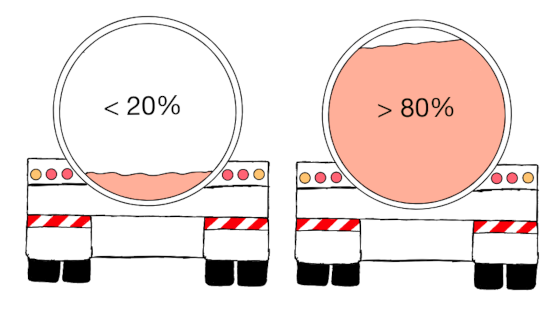



Για αντίστοιχους λόγους, θα πρέπει το πρώτο διαμέρισμα να είναι γεμάτο τουλάχιστον κατά $90\%$.
Ο στόχος μας είναι, δεδομένων των παραγγελιών και των φορτηγών που έχουμε στην διάθεσή μας, να ικανοποιήσουμε
όσες περισσότερες παραγγελίες μπορούμε. Κάθε φορτηγό μπορεί να φορτωθεί με μόνο μία παραγγελία.

#### Βήμα 1ο
Αρχικά θα λύσουμε το πρόβλημα της φόρτωσης μιας παραγγελίας σε ένα φορτηγό. Θέλουμε να υλοποιήσουμε μια ρουτίνα που δεδομένης μιας παραγγελίας και ενός φορτηγού να μπορεί να μας απαντήσει αν υπάρχει τρόπος να φορτωθεί η παραγγελία στο φορτηγό ικανοποιώντας όλους τους περιορισμούς και να μας επιστρέφει μια τέτοια ανάθεση.

Σε ένα κελί κειμένου περιγράψτε το MIP που λύνει το πρόβλημα της φόρτωσης. Έπειτα, συμπληρώστε την συνάρτηση 
load η οποία δέχεται ως παραμέτρους την παραγγελία και το φορτηγό και επιστρέφει μια feasible ανάθεση, εφ' όσον αυτή υπάρχει.


Θεωρούμε $r_i = order[i]$, και $t_j = truck[j]$, όπου $i \in {0, ..., n}$ και $j \in {0, ..., m}$. Επίσης, ορίζουμε $k = argmax\{t_j\}$ \\
To MIP που λύνει το πρόβλημα της φόρτωσης είναι το ακόλουθο:
\begin{align}
    \text{subject to} &\quad \sum_{j=1}^{m} x_{ij} = r_i \forall i \in [0,...,n]
    &\\
    &\quad \sum_{j=1}^{n} d_{i,j} = 1 \forall j \in [0,...,m]
    &\\
    &\quad x_{i,j} \leq d_{ij} \cdot t_j \forall i,j
    &\\
    &\quad \sum x_{i1} \geq 0.9 \cdot t_1
    &\\
    &\quad x_{ij} \geq 0 
    &\\
    &\quad d_{ij} \in \{0,1\}
\end{align}
Στη συνέχεια έχουμε 2 περιπτώσεις:
\begin{align}
    &\quad \sum x_{ik} \geq 0.8 \cdot t_k
    &\\
    &\quad \sum x_{ik} \leq 0.2 \cdot t_k
\end{align}
Λύνουμε το MIP δύο φορές, μία για κάθε περίπτωση.

In [1]:
'''
Parameters:
  - order: a list of integers. order[i] represents the demand for the i-th order item
  
  - truck: a list of integers. truck[i] represents the capacity of the i-th compartment
  

Returns:
  - assignment: a 2d table describing a feasible loading.
                assignment[i][j] is a float number (0 <= assignment[i][j] <= order[i])
                that represents the amount of the i-th order that is put in the j-th compartment.
                
                If there is no feasible assignment, return an empty list.

Examples:

order = [1500,100,200], truck = [500,400,600,100,200,100]
assignment = 
[[500.0, 400.0, 600.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
 [0.0, 0.0, 0.0, 100.0, 0.0, 100.0]]
 

order = [2500], truck = [1000,2000]
assignment = [[900.0, 1600.0]]

order = [800], truck = [1000]
assignment = []
'''
from ortools.linear_solver import pywraplp

def load(order, truck):
    
    solver = pywraplp.Solver.CreateSolver('SCIP')
    infinity = solver.infinity()
    
    n = len(order)
    m = len(truck)
    
    result=[]
    
    temp = max(truck)
    for j in range(m):
        if temp==truck[j]:
            k=j
            break
            
    C = {} 
    for i in range(n):
        C[i] = []
        for j in range(m):
            C[i].append( solver.IntVar(0, infinity, f'e_{i}'))
            
    D = {} 
    for i in range(n):
        D[i] = []
        for j in range(m):
            D[i].append( solver.IntVar(0, 1, f'e_{i}'))
            
    for i in range(n):
        solver.Add( solver.Sum([ C[i][j] for j in range(m) ]) == order[i] )
        
    for j in range(m):
        solver.Add( solver.Sum([ D[i][j] for i in range(n) ]) == 1 )
    
    for i in range(n):
        for j in range(m):
            solver.Add( C[i][j] <= D[i][j] * truck[j] )
            
    solver.Add( solver.Sum([ C[i][0] for i in range(n) ]) >= 0.9 * truck[0] )
    
    solver.Add( solver.Sum([ C[i][k] for i in range(n) ]) >= 0.8 * truck[k] ) #real number!!!
    

    status = solver.Solve()
    
    if status == solver.OPTIMAL or status == solver.FEASIBLE:
        for i in range(n):
            result.append([])
            for j in range(m):
                result[i].append(C[i][j].solution_value())
                
    else:
        solver = pywraplp.Solver.CreateSolver('SCIP')
        C = {} 
        for i in range(n):
            C[i] = []
            for j in range(m):
                C[i].append( solver.IntVar(0, infinity, f'e_{i}'))

        D = {} 
        for i in range(n):
            D[i] = []
            for j in range(m):
                D[i].append( solver.IntVar(0, 1, f'e_{i}'))

        for i in range(n):
            solver.Add( solver.Sum([ C[i][j] for j in range(m) ]) == order[i] )

        for j in range(m):
            solver.Add( solver.Sum([ D[i][j] for i in range(n) ]) == 1 )

        for i in range(n):
            for j in range(m):
                solver.Add( C[i][j] <= D[i][j] * truck[j] )
        
        solver.Add( solver.Sum([ C[i][0] for i in range(n) ]) >= 0.9 * truck[0] )
        
        solver.Add( solver.Sum([ C[i][k] for i in range(n) ]) <= 0.2 * truck[k] ) #real number!!!

        status = solver.Solve()

        if status == solver.OPTIMAL or status == solver.FEASIBLE:
            for i in range(n):
                result.append([])
                for j in range(m):
                    result[i].append(C[i][j].solution_value())
       
    return result



##### Έλεγχος λύσης

Για τον έλεγχο του πρώτου βήματος, θα χρειαστεί να δημιουργήσετε ένα αρχείο solution.py το οποίο θα περιέχει την συνάρτηση
load που υλοποιήσατε παραπάνω και θα χρησιμοποιηθεί για τον αυτόματο έλεγχο της λύσης σας.
Προσέξτε κατά την αντιγραφή της συνάρτησης στο αρχείο να προσθέσετε και όποια imports βιβλιοθηκών πιθανώς
έχετε χρησιμοποιήσει.

Μόλις δημιουργήσετε το αρχείο solution.py, η παρακάτω εντολή ελέγχει την λύση σας πάνω σε όλα τα public testcases.

In [10]:
!python3 evaluate.py --ex1

+++ Testcase 0 OK!
+++ Testcase 1 OK!
+++ Testcase 2 OK!
+++ Testcase 3 OK!
+++ Testcase 4 OK!
+++ Testcase 5 OK!
+++ Testcase 6 OK!
+++ Testcase 7 OK!
+++ Testcase 8 OK!
+++ Testcase 9 OK!


#### Βήμα 2ο

Στο 2ο Βήμα θα χρησιμοποιήσουμε την ρουτίνα για την φόρτωση μιας παραγγελίας σε ένα φορτηγό ως μαύρο κουτί και θα προσπαθήσουμε να λύσουμε το συνολικό πρόβλημα. Δεδομένων όλων των παραγγελιών και των διαθέσιμων φορτηγών θα υλοποιήσουμε την συνάρτηση assign η οποία θα ικανοποιεί όσες περισσότερες παραγγελίες είναι δυνατό. Όλες οι παραγγελίες έχουν την ίδια προτεραιότητα και κάθε φορητγό μπορεί να δεχτεί το πολύ μία παραγγελία.


Σε ένα κελί κειμένου περιγράψτε την λύση σας και στην συνέχεια συμπληρώστε την συνάρτηση assign.

*Σημείωση*: μπορείτε να χρησιμοποιήσετε ως υπορουτίνες την συνάρτηση load καθώς και συναρτήσεις που υλοποιήσατε στην 1η εργαστηριακή άσκηση, απλώς φροντίστε να τις αντιγράψετε σε ένα κελί κώδικα (και στο αρχείο solution.py) ώστε να μπορείτε να τις καλέσετε.

Χρησιμοποιούμε την load για να φτιάξουμε τη λίστα comp, η οποία περιέχει τα εφικτά ζευγάρια φορτηγών-παραγγελιών. Έπειτα χρησιμοποιούμε την συνάρτηση matching από την Άσκηση 1 η οποία υπολογίζει την ανάθεση παραγγελιών σε φορτηγά που μεγιστοποιεί τον αριθμό παραγγελιών που ικανοποιούνται.


In [13]:
'''
Parameters:
  - orders: μία λίστα από λίστες ακεραίων. Η λίστα orders[i] αντιπροσωπεύει την παραγγελία i και το orders[i][j]
  είναι η ποσότητα καυσίμου του j-οστού αντικειμένου της i-οστής παραγγελίας.
  
  - m: μια λίστα από λίστες ακεραίων. Η λίστα trucks[i] αντιπροσωπεύει το i-οστό φορτηγό και το trucks[i][j] είναι
  η χωρητικότητα του j-οστού διαμερίσματος του i-οστού φορτηγού.
  
Returns:
  - assignments: μια λίστα με tuples (x,y,z) τα οποία υποδηλώνουν ότι η παραγγελία
    x θα παραδοθεί από το φορτηγό y, όπου τα x και y είναι οι δείκτες της παραγγελίας και του φορτηγού στις λίστες εισόδου.
    Το z είναι μια 2d λίστα που περιγράφει την φόρτωση της παραγγελίας στο φορτηγό και έχει το ίδιο format που επιστρέφει
    και η συνάρτηση load.

Sample input:
orders = [[1000], [200,200], [400,400,400]]
trucks = [[800,200,100], [300,400,300], [400,500,500]]

Sample output:
[
 (0, 0, [[720.0, 200.0, 80.0]]),
 
 (2, 2, [[400.0, 0.0, 0.0], 
         [0.0, 0.0, 400.0], 
         [0.0, 400.0, 0.0]]
 )
]

Σημείωση: σε κάποια παραδείγματα πιθανώς να υπάρχουν πολλές αναθέσεις που διεκπαιρεώνουν τον ίδιο αριθμό
παραγγελιών. Μας ενδιαφέρει απλώς να ικανοποιήσετε τον μέγιστο αριθμό παραγγελιών και όλες οι αναθέσεις να ικανοποιούν τους
περιορισμούς της εκφώνησης.
'''
def matching(n, m, comp):

    solver = pywraplp.Solver.CreateSolver('SCIP')

    C = len(comp) 

    X = {}
    Y = {}
    
    for i in range(n):
        X[i] = []
    for i in range(m):
        Y[i] = []   

    
    for i in range(C):
        X[comp[i][0]].append(i)
        Y[comp[i][1]].append(i)
    
    e = {}

    for i in range(C):
        e[i] = solver.IntVar(0, 1, f'e_{i}')


    for j in range(n):
        solver.Add( solver.Sum([ e[i] for i in X[j] ]) <= 1 )
        
    for j in range(m):
        solver.Add( solver.Sum([ e[i] for i in Y[j] ]) <= 1 )

    solver.Maximize(solver.Sum([e[i] for i in range(C)]))

    solver.set_time_limit(20) # 20 sec

    status = solver.Solve()

    result = [] 

    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        result = [i for i in range(C) if e[i].solution_value() > 0]


    return [comp[i] for i in result]

def assign(o,t):
    
    n = len(o)
    m = len(t)
    comp = []
    l = []
    for i in range(n):
        l.append([])
        for j in range(m):
            l[i].append(load(o[i],t[j]))
            if l[i][j]!=[]:
                comp.append((i,j))
    
    match=matching(n,m,comp)
    res=[]
    for pair in match:
        res.append((pair[0],pair[1],l[pair[0]][pair[1]]))
        
    return(res)
    
    


Στο αρχείο solution.py που δημιουργήσατε στο πρώτο βήμα, μεταφέρετε την συνάρτηση assign
μαζί με πιθανά imports βιβλιοθηκών και άλλες συναρτήσεις που έχετε χρησιμοποιήσει και δεν βρίσκονται στο αρχείο. 
Χρησιμοποιείστε την επόμενη εντολή για να ελέγξετε την λύση σας.

In [14]:
!python3 evaluate.py --ex2

+++ Testcase 0 OK!
+++ Testcase 1 OK!
+++ Testcase 2 OK!
+++ Testcase 3 OK!
+++ Testcase 4 OK!
+++ Testcase 5 OK!
+++ Testcase 6 OK!
+++ Testcase 7 OK!
+++ Testcase 8 OK!
+++ Testcase 9 OK!


## Παραδοτέα

Για το 1ο βήμα
 * Σε ένα κελί κειμένου περιγράψτε το Mixed Integer Program που λύνει την άσκηση
 * Υλοποιήστε το MIP χρησιμοποιώντας τα or-tools στην συνάρτηση load
 * Δοκιμάστε τα sample testcases και sanity checks
 * Μεταφέρετε την load στο αρχείο solution.py που θα δημιουργήσετε και τρέξτε το evalute.py με παράμετρο --ex1 για να δείτε ότι περνάτε επιτυχώς όλα τα public testcases

Για το 2ο βήμα
 * Σε ένα κελί κειμένου περιγράψτε την λύση σας
 * Υλοποιήστε στην συνάρτηση assign
 * Τρέξτε το sample testcase
 * Μεταφέρετε την assign στο αρχείο στο αρχείο solution.py που ήδη είχατε φτιάξει, και τρέξτε το evalute.py με παράμετρο --ex22 για να δείτε ότι περνάτε επιτυχώς όλα τα public testcases

Παραδοτέα

 * Αποθηκεύστε το παρόν notebook σαν html αρχείο (File --> Download as --> HTML) και φροντίστε να έχετε τρέξει όλα τα κελιά ώστε να φαίνονται τα αποτελέσματα.
 * Θα παραδόσετε ένα αρχείο .zip που θα περιέχει το notebook σαν html αρχείο και το python script που δημιουργήσατε (solution.py)